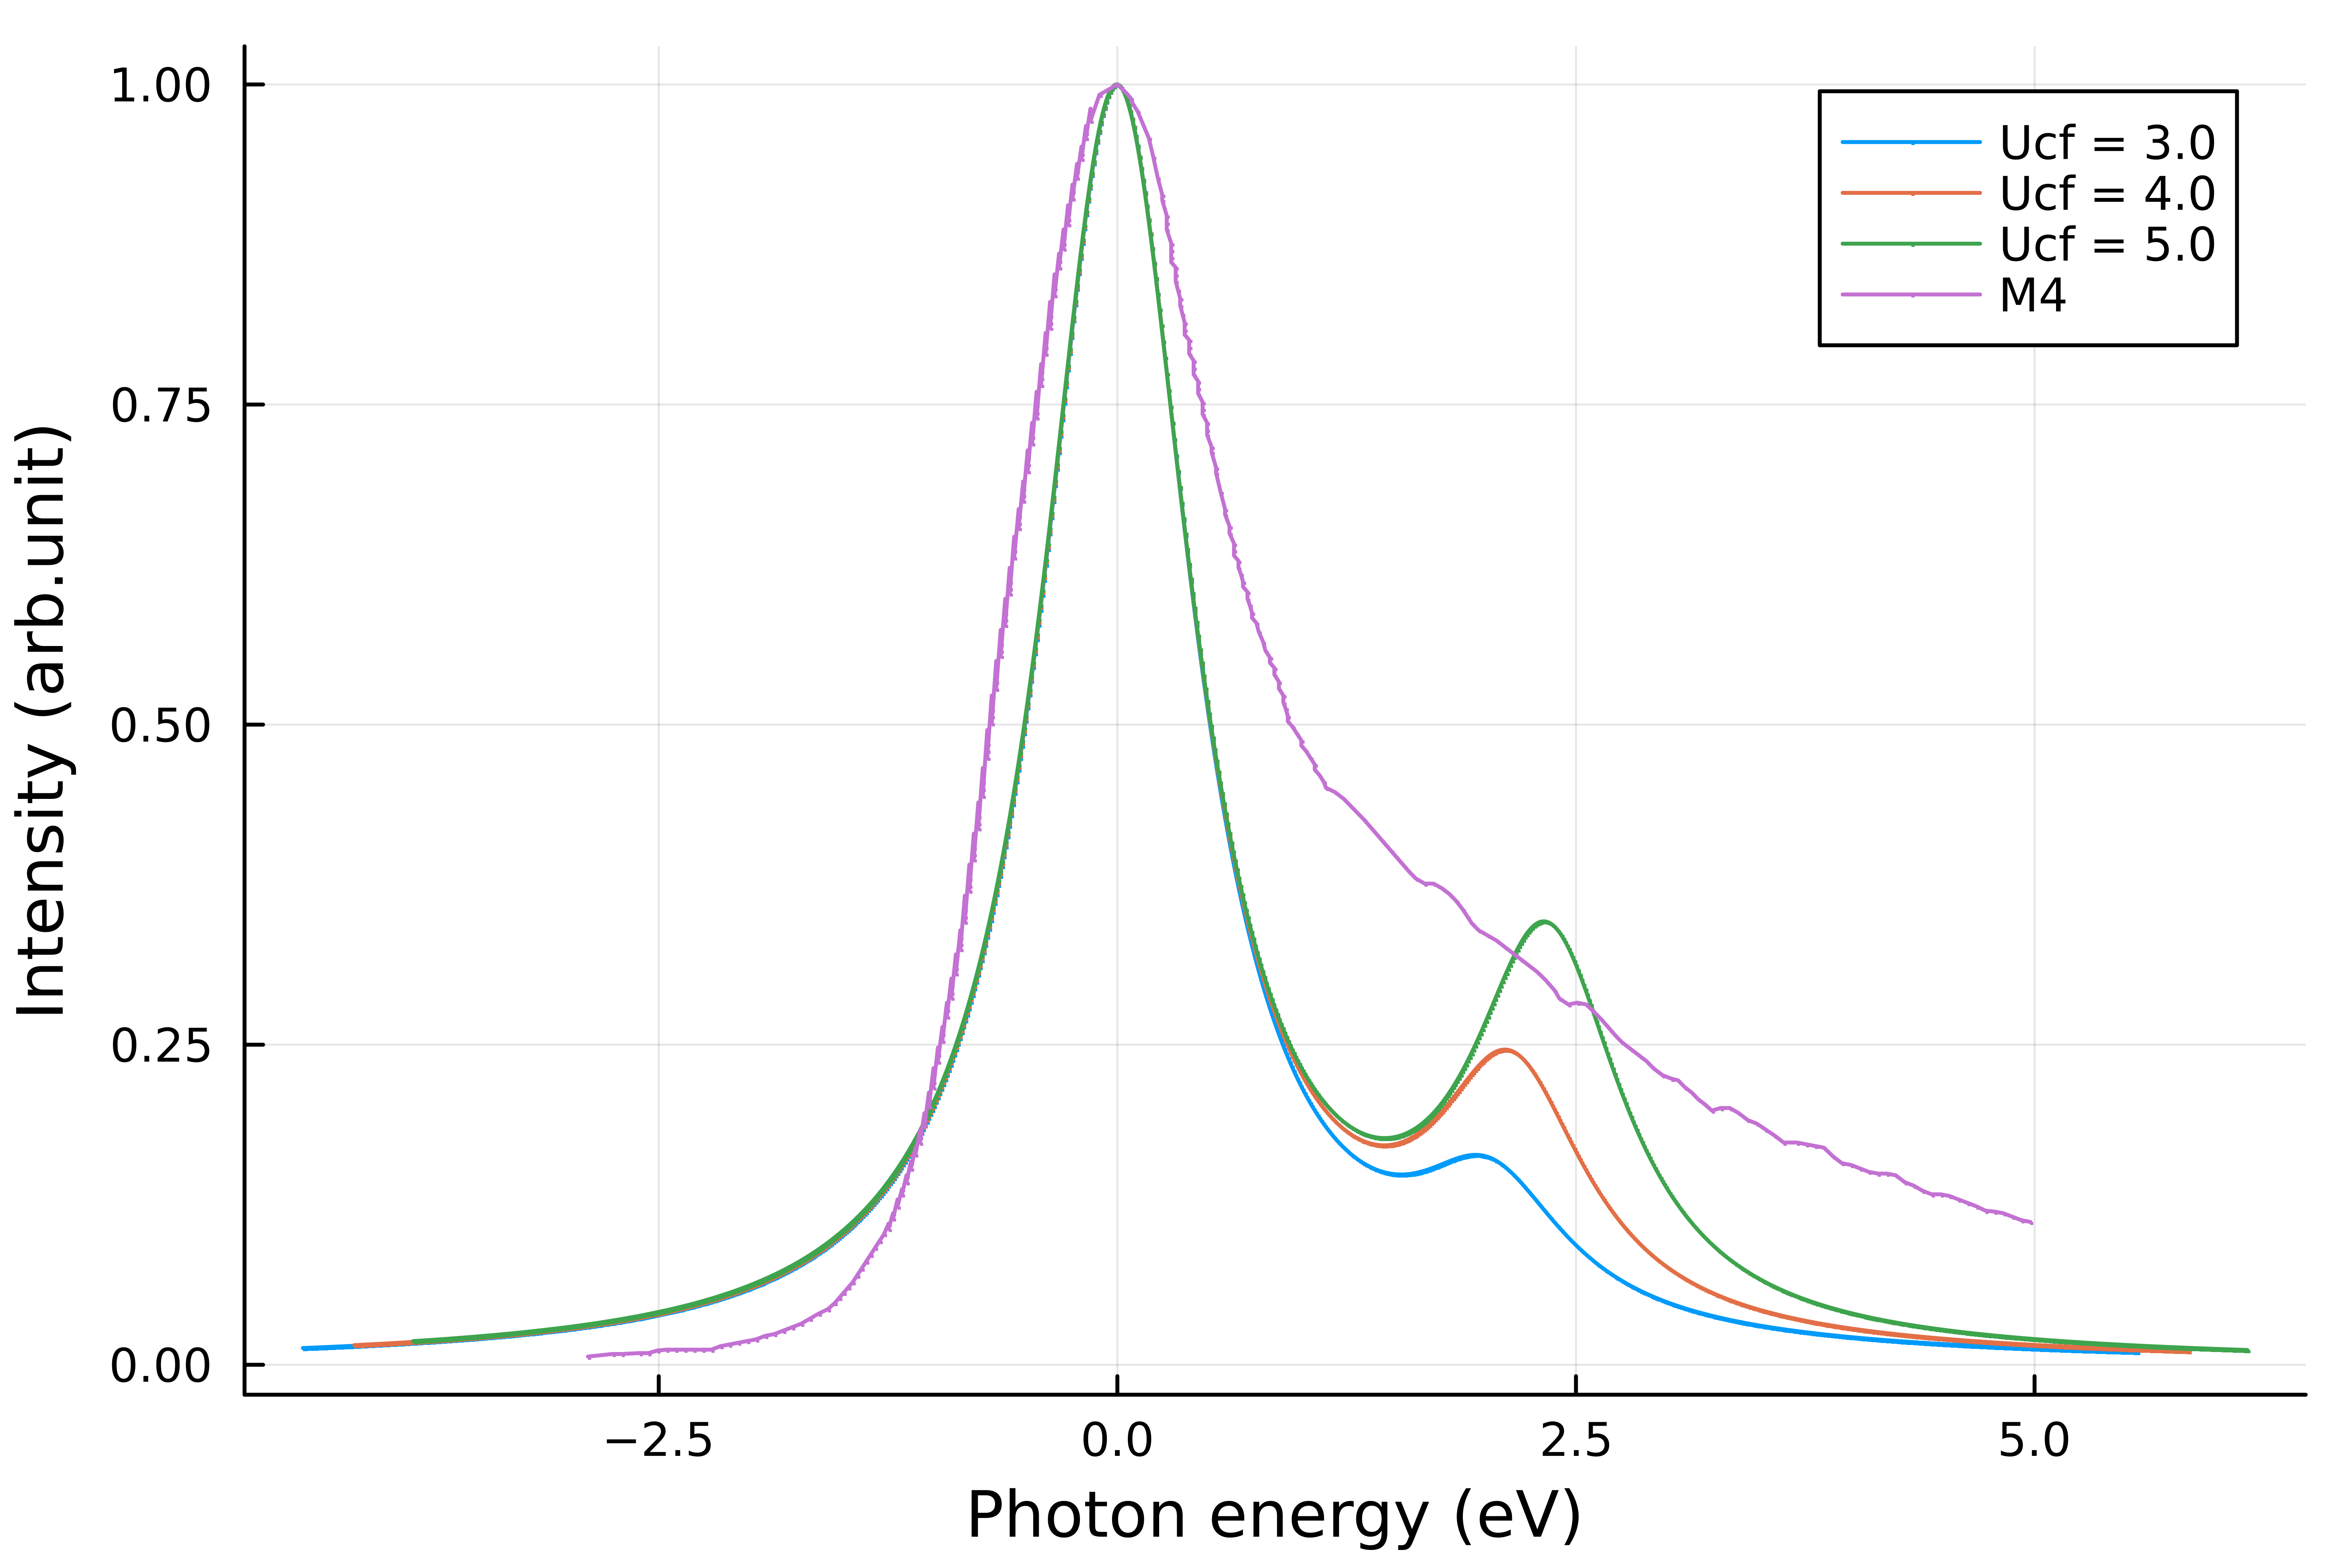

In [6]:
using LinearAlgebra
using Plots
using DelimitedFiles

# UGa2のXPSのパラメータ設定
t = 1
delta = 1
Ucf_values = [3.0, 4.0, 5.0] 
smalldelta = 0.5

# 新しいプロットを作成
p = plot(dpi=1000)

# Ucf_valuesの各値に対してループ
for Ucf in Ucf_values
    Uff = Ucf/1.8
    Hg = [
        0 t
        t delta
    ]
    Hf = [
        0 t
        t delta - Ucf + Uff
    ]
    Eg, Vg = eigen(Hg)
    Ef, Vf = eigen(Hf)

    function F1(Eg, Vg, Ef, Vf, Eb)
        return ((abs(dot(Vg[:, 1], Vf[:, 1])))^2) / (Eb + Eg - Ef + im * smalldelta)
    end

    function F2(Eg, Vg, Ef, Vf, Eb)
        return ((abs(dot(Vg[:, 1], Vf[:, 2])))^2) / (Eb + Eg - Ef + im * smalldelta)
    end

    # UGa2のXPSデータを計算してプロット
    data = []
    for Eb in -5:0.01:5
        ints = (-1 / π) * imag(F1(Eg[1], Vg, Ef[1], Vf, Eb) + F2(Eg[1], Vg, Ef[2], Vf, Eb))
        push!(data, [Eb, ints])
    end

    data = hcat(data...)
    x = data[1, :]
    y = data[2, :]

    # yの最大値とその位置を取得
    ymax = maximum(y)
    xmax = x[argmax(y)]

    # xを最大値の位置を原点にずらしてプロット
    x_shifted = x .- xmax

    # yのピークでの値が1になるように倍率を計算
    scale_factor = 1 / ymax

    # yを倍率でスケーリング
    y_scaled = y * scale_factor

    plot!(p, x_shifted, y_scaled, xlabel="Photon energy (eV)", ylabel="Intensity (arb.unit)", label="Ucf = $Ucf", marker=:auto, markersize=0)
end

# "modified_chushutu.dat"のデータを読み込む
data_chushutu = readdlm("modified_chushutu.dat", ',')

# データを x と y に分割
x_chushutu = data_chushutu[:, 1]
y_chushutu = data_chushutu[:, 2]

# yのピークでの値が1になるように倍率を計算
scale_factor_chushutu = 1 / maximum(y_chushutu)

# yを倍率でスケーリング
y_scaled_chushutu = y_chushutu * scale_factor_chushutu

# yの最大値とその位置を取得
ymax_chushutu = maximum(y_scaled_chushutu)
xmax_chushutu = x_chushutu[argmax(y_scaled_chushutu)]

# xを最大値の位置を原点にずらしてプロット
x_shifted_chushutu = x_chushutu .- xmax_chushutu

# プロットに追加
plot!(p, x_shifted_chushutu, y_scaled_chushutu, label="M4", marker=:auto, markersize=0)

# プロットを表示
display(p)


In [7]:
xlims!(p,-5,5)
savefig("1.8plot.png")

"/Users/andrew/Desktop/shinaoka_workspace/Two-level-model/UGa2/1.8plot.png"